# Introduction

In this project, we used Supervised Learning to train an agent to complete a simplified version of our assigment in Project 1 of this class: the game Exactly One Mazes.

This agent will be trained in order for it to learn how to win the game.

The objective of the game is to have the player cross from the bottom-left to the top right square, without crossing the same L shape more than one time.

The Player can move in any direction, as long as the square he is in does not belong to an already visited L shape.

# Required Libraries and Tools

● OpenAI Gym - A framework that acts as a playground for testing agents, using
controlled environments;

● Numpy - A library for processing data in arrays;

● Matplotlib and Seaborn - Data visualization libraries to draw plots and charts;

● Jupyter Notebooks - Interactive computing and development.

# Algorithms employed

To teach the agent, the following algorithms were implemented:

● Q-Learning - State–action–reward–state;

● SARSA - State–action–reward–state–action.

# Simple Model

In the easy mode, a 4x4 board was used with two L shapes, with them close enough to be easy to figure out a path.

The rewards were distributed in such a way that the algorithm was severely punished for every bad move:

● If visiting an already visited cell, -50 points

● If visiting an L shape for the second time, -50 points

● If it reached the end without visiting all L shapes, -50 points

● If landing in a neutral (0) cell, -0.5 points

● This was made so the algorithm would reach the end as fast as possible

● If visiting a newly discovered L shape, +10 points

● If it reached the end and visited all L shapes, +10 points


# Complex Model

This model has one more L.

Additionally, we increased the punishment for visiting a 0 cell from 0 to -0.75.

# Hyperparameters

● Learning rate: 0.5

● Discount factor: 0.6

● Epsilon: 0.1 and 0.01 decay rate

● Total training episodes: 500 with 100 steps maximum


## Example Game board

In [4]:
import sys
sys.path.append('C:\python310\lib\site-packages')

from new_env import TakeTheLEnv


env = TakeTheLEnv()
env.reset()
env.render()


    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



## Defining hyperparameters

In [15]:
import numpy as np

qtable = np.zeros((env.observation_space.n, env.action_space.n))

total_episodes = 500  # the total number of episodes to run
max_steps = 100  # the maximum number of steps per episode

learning_rate = 0.5  # the learning rate

gamma = 0.6  # the discount factor

# the range for the exploration parameter epsilon
epsilon = 0.1
min_epsilon = 0.01
max_epsilon = 1.0
decay_rate = 0.01

rewards = []
epsilons = []

## Algorithms code

In [16]:
def choose_action(state):
    exp_exp_tradeoff = random.uniform(0, 1)

    if exp_exp_tradeoff < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(qtable[state, :])
    return action


def update_qlearning(state, new_state, reward, action):
    qtable[state, action] = qtable[state, action] + learning_rate * (
        reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action]
    )


def update_sarsa(state, new_state, reward, action, new_action):
    qtable[state, action] = qtable[state, action] + learning_rate * (
        reward + gamma * qtable[new_state, new_action] - qtable[state, action]
    )


def qlearn(sarsa):
    global qtable
    success = 0
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_rewards = 0
        for _ in range(max_steps):
            # Converting the state to a position on the table
            action = choose_action(state)
            new_state, reward, done, info = env.step(action)

            if sarsa:
                new_action = choose_action(new_state)
                update_sarsa(state, new_state, reward, action, new_action)
            else:
                update_qlearning(state, new_state, reward, action)

            total_rewards += reward

            state = new_state
            env.set_state(env.from_idx(new_state))

            if done:
                if total_rewards < 0:
                    print("Failed episode:", episode)
                else:
                    env.render()
                    success += 1
                print("Total reward for episode {}: {}".format(episode, total_rewards))
                break

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(
            -decay_rate * episode
        )
        rewards.append(total_rewards)
        epsilons.append(epsilon)

    print("Score/time: " + str(sum(rewards) / total_episodes))
    print("success of", success/total_episodes)
    print(qtable)

    x = range(total_episodes)
    plt.plot(x, rewards)
    plt.xlabel("Episode")
    plt.ylabel("Training total reward")
    plt.title("Total rewards over all episodes in training")
    plt.show()

    plt.plot(epsilons)
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.title("Epsilon for episode")
    plt.show()

    qtable = np.zeros((env.observation_space.n, env.action_space.n))
    rewards.clear()
    epsilons.clear()


## Algorithms execution

Q-LEARNING
Failed episode: 1
Total reward for episode 1: -200
Failed episode: 2
Total reward for episode 2: -180
Failed episode: 3
Total reward for episode 3: -80
Failed episode: 4
Total reward for episode 4: -480
Failed episode: 5
Total reward for episode 5: -190
Failed episode: 6
Total reward for episode 6: -220
Failed episode: 7
Total reward for episode 7: -300
Failed episode: 8
Total reward for episode 8: -470
Failed episode: 9
Total reward for episode 9: -330
Failed episode: 10
Total reward for episode 10: -80

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 11: 20
Failed episode: 12
Total reward for episode 12: -80

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 13: 20

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 

Failed episode: 481
Total reward for episode 481: -20
Failed episode: 482
Total reward for episode 482: -120
Failed episode: 483
Total reward for episode 483: -120
Failed episode: 484
Total reward for episode 484: -20
Failed episode: 485
Total reward for episode 485: -20
Failed episode: 486
Total reward for episode 486: -20
Failed episode: 487
Total reward for episode 487: -20
Failed episode: 488
Total reward for episode 488: -20
Failed episode: 489
Total reward for episode 489: -70
Failed episode: 490
Total reward for episode 490: -70
Failed episode: 491
Total reward for episode 491: -20
Failed episode: 492
Total reward for episode 492: -20
Failed episode: 493
Total reward for episode 493: -20
Failed episode: 494
Total reward for episode 494: -180
Failed episode: 495
Total reward for episode 495: -20
Failed episode: 496
Total reward for episode 496: -20
Failed episode: 497
Total reward for episode 497: -20

    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |


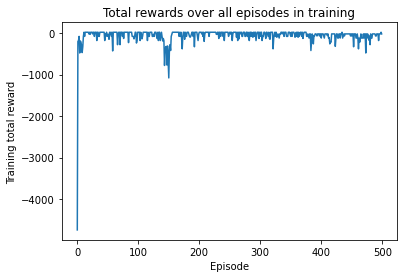

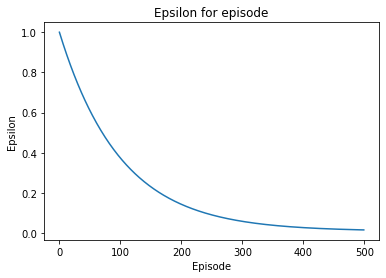

In [19]:
print("Q-LEARNING")
algs.qlearn(False)

SARSA
Failed episode: 0
Total reward for episode 0: -4080
Failed episode: 1
Total reward for episode 1: -970
Failed episode: 2
Total reward for episode 2: -490
Failed episode: 3
Total reward for episode 3: -1430
Failed episode: 4
Total reward for episode 4: -230
Failed episode: 5
Total reward for episode 5: -490
Failed episode: 6
Total reward for episode 6: -1130
Failed episode: 7
Total reward for episode 7: -580
Failed episode: 8
Total reward for episode 8: -20
Failed episode: 9
Total reward for episode 9: -20
Failed episode: 10
Total reward for episode 10: -20
Failed episode: 11
Total reward for episode 11: -170
Failed episode: 12
Total reward for episode 12: -20
Failed episode: 13
Total reward for episode 13: -20
Failed episode: 14
Total reward for episode 14: -20
Failed episode: 15
Total reward for episode 15: -370
Failed episode: 16
Total reward for episode 16: -120
Failed episode: 17
Total reward for episode 17: -20
Failed episode: 18
Total reward for episode 18: -20
Failed episo

Failed episode: 475
Total reward for episode 475: -430
Failed episode: 476
Total reward for episode 476: -140
Failed episode: 477
Total reward for episode 477: -190
Failed episode: 478
Total reward for episode 478: -140
Failed episode: 479
Total reward for episode 479: -770
Failed episode: 480
Total reward for episode 480: -2480
Failed episode: 481
Total reward for episode 481: -690
Failed episode: 482
Total reward for episode 482: -430
Failed episode: 483
Total reward for episode 483: -220
Failed episode: 484
Total reward for episode 484: -70
Failed episode: 485
Total reward for episode 485: -20
Failed episode: 486
Total reward for episode 486: -20
Failed episode: 487
Total reward for episode 487: -20
Failed episode: 488
Total reward for episode 488: -20
Failed episode: 489
Total reward for episode 489: -20
Failed episode: 490
Total reward for episode 490: -20
Failed episode: 491
Total reward for episode 491: -20
Failed episode: 492
Total reward for episode 492: -70
Failed episode: 49

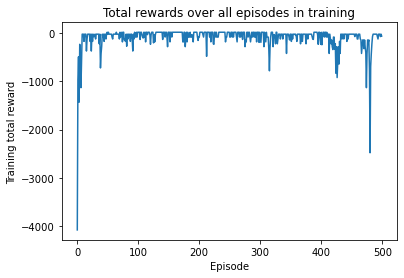

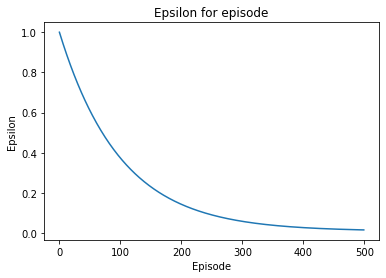

In [20]:
print("SARSA")
algs.qlearn(True)